# Projeto 2 - Ciência dos Dados

## **Membros**

**Gabriel Salvator Benatar**

**Matheus Freitas Sant'Ana**

___
## **Imports necessários**

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math

___
## Funções a serem utilizadas

In [2]:
# Função chamada quando deseja-se corrigire o index do Dataframe para ordem crescente de 0,1,2,...
# Geralmente após ter feito uma filtragem de sort_values(), em que o index é embaralhado.

def corrige_index(df):
    for i in range(df.shape[0]):
        df.index.values[i] = i 
    
    
# Função chamada quando deseja-se calcular a acurácia via MAPE (Mean Absolute Percentage Error).
# Recebe como um dos parâmetros o número de chunks a dividir a array para calcular as arrays, TEM
# que ser um número divisível pelo tamanho total da array!

def calcula_acuracia_individual(array_errors, array_reals, divisor):
    lista_acuracia = []
    i = 0
    while i <= len(array_errors.index):
        mape = 100 * (array_errors[i:i+divisor]/ array_reals[i:i+divisor])
        accuracy = 100 - np.mean(mape)
        lista_acuracia.append(accuracy)
        i += divisor
    return lista_acuracia


# Função que é chamada quando se deseja adicionar uma linha ao Dataframe de resultados. Recebe como
# parâmetros os valores a serem adicionados de r2 e acurácia calculada via MAPE, além da string do 
# método utilizado.

def adiciona_linha_resultados(df, index_string, r2_test, r2_train, mape_train, mape_test):
    df = df.append({'R² (teste)': r2_test,
                           'R² (treinamento)': r2_train,
                           'MAPE (teste)': mape_train,
                           'MAPE (treinamento)': mape_test}, ignore_index = True,
                                  )
    index.append(index_string)
    df.index = index
    return df

___
# Classificador de popularidade de música do Spotify

## Como saber a popularidade de uma música com base nas suas _features_ ?

# Introdução:


O Spotify é um serviço de streaming digital que dá acesso instantâneo a milhões de músicas, podcasts, vídeos e outros conteúdos de artistas de todo o mundo. Nele há milhares de gêneros de músicas de todo lugar do mundo incluindo playlists que são criadas a partir do gosto do usuário. E por isso decidimos criar um classificador de popularidade de músicas do Spotify, que tem por objetivo último determinar, mediante determinadas variáveis, qual é a popularidade de uma música. A _popularity_  é uma medida de confiança de 0 a 100, em que quanto mais próximo de 100 mais popular a música é, e quanto mais próximo de 0 menos popular a música é.

## Definição de variáveis explicativas:


* _acousticness_ → É uma medida de de confiança de 0 a 1 que indica se a faixa é acústica, quanto mais próximo o valor é de 1, maior é a confiança da faixa ser acústica


* _artists_ →  indica o nome do artista


* _danceability_ → É uma medida de confiança de 0 a 1 que indica o quanto a música é adequada para dançar, para isso ela analisa uma combinação de elementos musicais, como: ritmo, estabilidade de ritmo, força de batida e regularidade geral. Se o valor é mais próximo de 0, ele é menos dançável, e mais próximo de um é mais dançável


* _duration ms_ → duração da faixa, em milisegundos


* _energy_ → É uma medida de confiança 0 a 1 que é perceptiva de intensidade e atividade da faixa. As faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, uma música bem agitada têm o valor mais próximo de 1, já um música mais calma têm valor mais próximo de 0


* _explicit_ → É um valor, 0 ou 1, caso exista conteúdo explícito na música o valor é igual a 1, caso contrário o valor é igual a 0


* _instrumentalness_ → É uma medida de confiança de 0 a 1 que indica se a faixa não contém vocais. Os sons "Ooh" e "aah" são tratados como instrumentais neste contexto. As faixas de rap ou de palavras faladas são claramente "vocais". Quanto mais próximo de 1, maior a confiança da faixa não conter conteúdo vocal. No caso, valor acima de 0,5 tem a intenção de representar uma faixa instrumental.


* _liveness_ → É uma medida de confiança de 0 a 1 que indica se a gravação foi feita ao vivo ou não (por exemplo, gravação em show). Valor mais próximo de 1,0 indica que a faixa foi gravada ao vivo. No caso, valor acima de 0,8 oferece uma forte probabilidade de ter sido gravada ao vivo.


* _loudness_ → É a medida do volume geral de uma faixa, em decibéis (dB). Este valor de volume representa a qualidade de um som em termos de força (amplitude) da música. Os valores variam tipicamente entre -60 dB e 0 dB e quanto maior, mais qualidade.


* _name_ → Nome da música


* _release_date_ → data específica em que a música foi lançada (ano ,mês, dia), algumas músicas, não têm a data específica, neste caso fica apenas o ano.


* _speechiness_ → É uma medida de confiança de 0 a 1 que indica presença de palavras faladas em uma música. Valor acima de 0,66 descreve que faixa provavelmente é composta inteiramente por palavras faladas. Valor entre 0,33 e 0,66 descreve que faixa pode conter música e fala, em seções ou em camadas, incluindo casos como música rap. Valor abaixo de 0,33 sugere que faixa não tem fala.


* _tempo_ → É uma medida medida em bpm (batimentos por minuto), quanto maior maior é o valor mais agitada a música é, por exemplo: uma música eletrônica têm bpm alto  enquanto uma música clássica têm bmp baixo.


* _valence_ → É uma medida de confiança de 0 a 1 que descreve a positividade musical transmitida por uma faixa. As faixas com alta valência soam mais positivas (por exemplo, alegres, alegres, eufóricas), enquanto as faixas com baixa valência soam mais negativas (por exemplo, tristes, deprimidas e zangadas).


* _year_ → ano em que a música foi lançada 

___
## Lendo o Dataframe a ser utilizado 

In [3]:
# Dada uma música, quais vão ser os seus audio features!
df = pd.read_csv('dataframe.csv')

In [4]:
df.head()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.9630,1921
1,1,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921
2,2,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,6,1921,0.0615,66.221,0.4060,1921
3,3,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,1SCWBjhk5WmXPxhDduD3HM,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0.0594,1921
4,4,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,4,1921,0.0380,101.665,0.2530,1921


In [5]:
df.shape

(168592, 20)

___
## Análise de correlação entre colunas 

Antes de começarmos a limpeza do _Dataframe_, é interessante entender a correlação entre cada coluna  de forma a entender quais delas são interessantes de serem utilizadas a princípio. Para isso, vamos plotar uma matriz que faz a correlação entre as colunas do _Dataframe_.

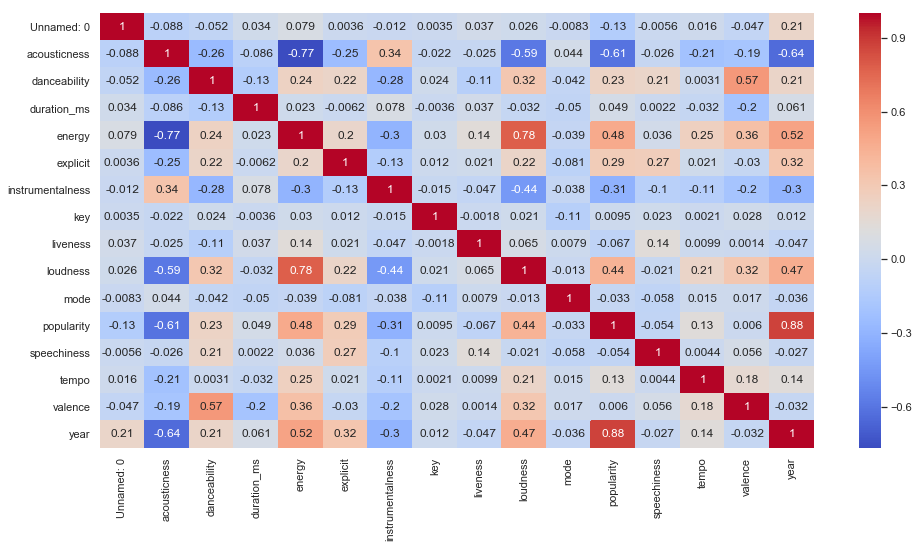

In [6]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

As "células" que têm uma cor mais quente indicam maior correlação e as que têm cores mais frias indicam menor correlação. Para nós, que queremos prever a popularidade de uma música com base em seus respectivos _audio features_, vamos analisar aquelas que têm relação linear com a coluna _popularity_. Nota-se de cara que _popularity_ tem uma alta correlação com (foram listadas em ordem decrescente de correlação com _popularity_):

* _year_ : sendo a maior correlação de colunas de TODO o dataframe, com uma correlação de 0.88, pode-se dizer que o ano tem altíssima influência na popularidade de uma música.


* _energy_ e _loudness_ :  com valores praticamente iguais de correlação (0.48 e 0.44, respectivamente), também têm uma alta influência na popularidade de uma música.


* _explicit_ e _danceability_ : com valores praticamente iguais de correlação (0.29  0.23, respectivamente), têm correlação com a popularidade de uma música, mesmo que não muito alta. 


* _acousticness_ e _instrumentalness_: com valores negativos de correlação (-0.59 e -0.44, respectivamente), são variáveis interessantes a serem utilizadas uma vez que indicam ausência de realação linear com popularidade. Ou seja, as músicas que tiverem baixos valores de dessas variáveis, talvez tenham valor de popularidade maior!

Além disso, talvez não seja interessante utilizar as outras colunas no nosso modelo, uma vez que são praticamente indiferentes à popularidade da música (_valence_, _tempo_, _speechinesss_, _mode_, _liveness_, _key_, _duration__ms_).

___
## **Análise da popularidade das músicas do _Dataframe_**


Plotando o histograma da popularidade das músicas, percebemos que a maioria das músicas **são pouco populares** e se encontram no intervalo de  popularidade entre 0 e 5. No entanto, após esse 'pico' de valores de músicas não-populares, a distribuição da variável se comporta similarmente àquela de uma normal! 

C:\Users\matfs\Downloads\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Histograma dos valores de popularidade')

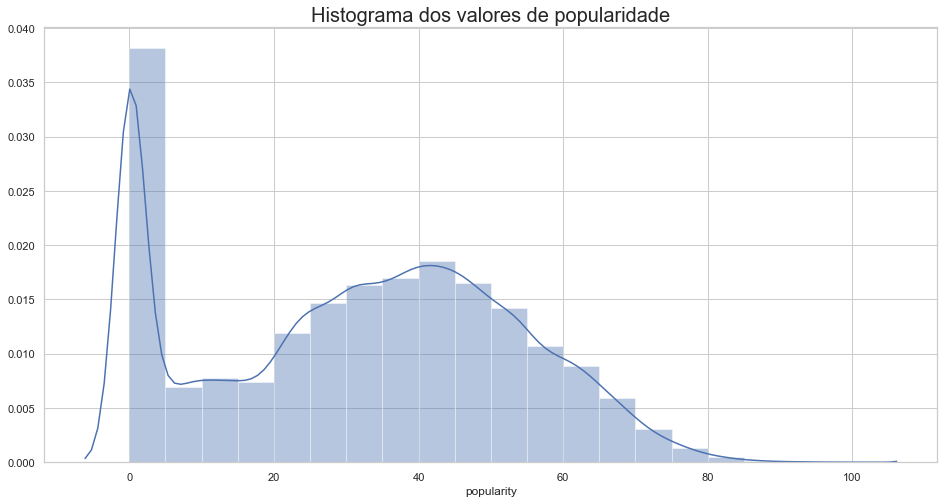

In [7]:
plt.figure(figsize=(16, 8))
sns.distplot(df.popularity,bins=20)
plt.title('Histograma dos valores de popularidade', fontsize=20, ha='center')

Para ilustrar que a distribuição se assemelha à de uma normal, vamos plotar dois _probplots_: um com todos os valores e outro com apenas os valores após o pico, cuja distribuição deve se "encaixar" com a de uma normal! 

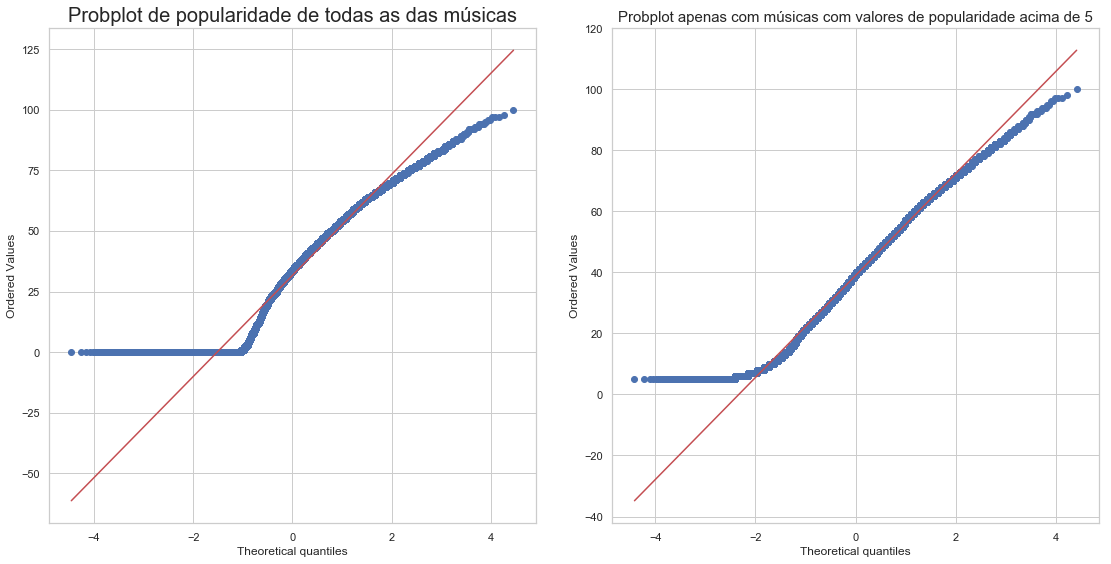

In [8]:
plt.figure(figsize=(16,8))

df_popAcimaCinco = df.loc[df.popularity >= 5, ['popularity']]

plt.subplot(121)
stats.probplot(df.popularity, dist="norm", plot=plt)
plt.title('Probplot de popularidade de todas as das músicas', fontsize=20, ha='center')


plt.subplot(122)
stats.probplot(df_popAcimaCinco['popularity'], dist="norm", plot=plt)
plt.title('Probplot apenas com músicas com valores de popularidade acima de 5', fontsize=15, ha='center')

plt.tight_layout()

Como pode-se notar acima, o gráfico à esuqerda, que demonstra o _probplot_ de todos os valores se encaixa bem menos com a curva da normal do que o da direita, que apenas utiliza valores de popularidade acima de 5 de músicas. Além disso, esse _probplot_ da direita se encaixa **razoavelmente bem** a uma normal, confirmando nossa hipótese!

Já que estamos tentando prever a popularidade de uma música, vamos analisar agora como são as características das músicas mais populares do nosso _Dataframe_! Para isso, primeiramente, criaremos um _Dataframe_ contendo apenas as 18 músicas mais populares, como uma amostra.

In [9]:
df_topPopular = df.sort_values(by='popularity', ascending = False)
df_topPopular = df_topPopular.iloc[:18]
corrige_index(df_topPopular)
df_topPopular.head()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,9875,0.00146,['The Weeknd'],0.514,200040,0.730,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,100,2020-03-20,0.0598,171.005,0.334,2020
1,9879,0.73100,"['Powfu', 'beabadoobee']",0.726,173333,0.431,0,7eJMfftS33KTjuF7lTsMCx,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,98,2020-02-08,0.1350,144.026,0.348,2020
2,9874,0.32100,['Drake'],0.834,247059,0.454,1,127QTOFJsJQp5LbJbu3A1y,0.000006,1,0.1140,-9.750,0,Toosie Slide,97,2020-04-03,0.2010,81.618,0.837,2020
3,9772,0.10400,['Roddy Ricch'],0.896,196653,0.586,1,0nbXyq5TXYPCO7pr3N8S4I,0.000000,10,0.7900,-6.687,0,The Box,97,2019-12-06,0.0559,116.971,0.642,2019
4,9872,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.537,1,39Yp9wwQiSRIDOvrVg7mbk,0.000000,0,0.1570,-7.648,0,THE SCOTTS,97,2020-04-24,0.0514,129.979,0.280,2020


Text(0.5, 1.0, 'Top 18 músicas mais populares')

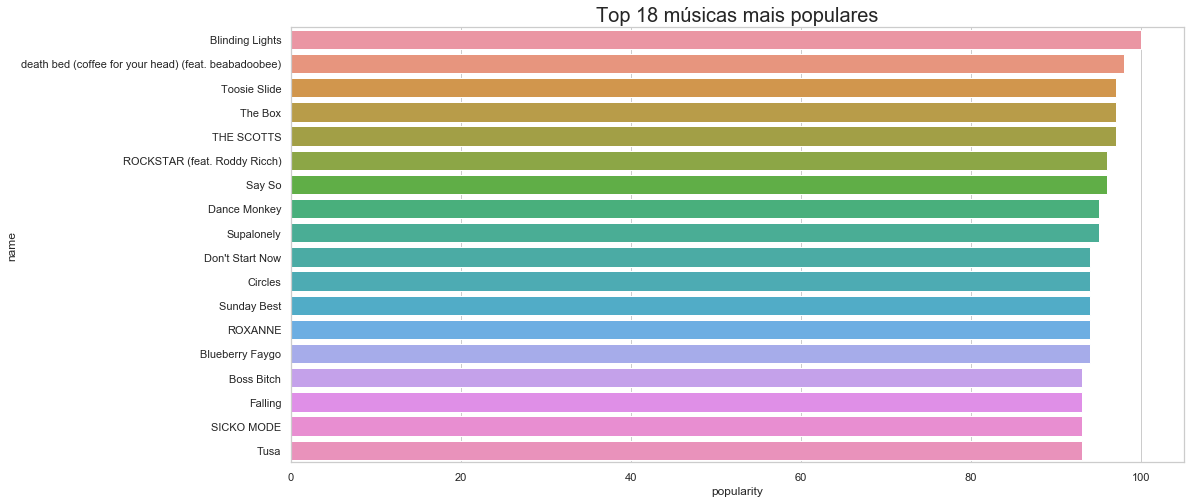

In [10]:
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = df_topPopular.popularity,ax=ax, y=df_topPopular.name)
plt.title('Top 18 músicas mais populares', fontsize=20, ha='center')

O gráfico acima nos permite quais são os valores de popularidade das músicas de nosso _Dataframe_. O eixo y nos diz o nome da música e o eixo x o valor de popularidade. Podemos notar que todas tem valores acima de 90, e a única que tem 100 de popularidade (o máximo) é _Binding Lights_, uma música super recente (em relação à data em que esse trabalho foi feito, Junho de 2020) do _The Weeknd_, reafirmando que o ano tem muita relação com a popularidade de uma música.

Agora, vamos analisar as _audio features_ dessas músicas mais populares. Para isso,plotaremos um _radar chart_ em que cada "extremidade" dos polígonos formados indica a quantidade de uma _feature_. Vamos pegar apenas os valores dados em porcentagem ou que não tem um valor muito pequeno, pois caso considerarmos _features_ como  _instrumentalness_, em que, sem exceção, todas as músicas do _Dataframe_ tem valor muito próximo de 0, isso prejudicaria a visualização e não nos ajudaria a tomar conclusões (OBS: Código extraído de [5], disponível em **Referências**).

In [11]:
music_features = ('acousticness', 'danceability', 'energy', 'valence')
for i in music_features:
    df_topPopular[i] = df_topPopular[i]*100 # Multiplicamos por 100 para ser dado em porcentagem.

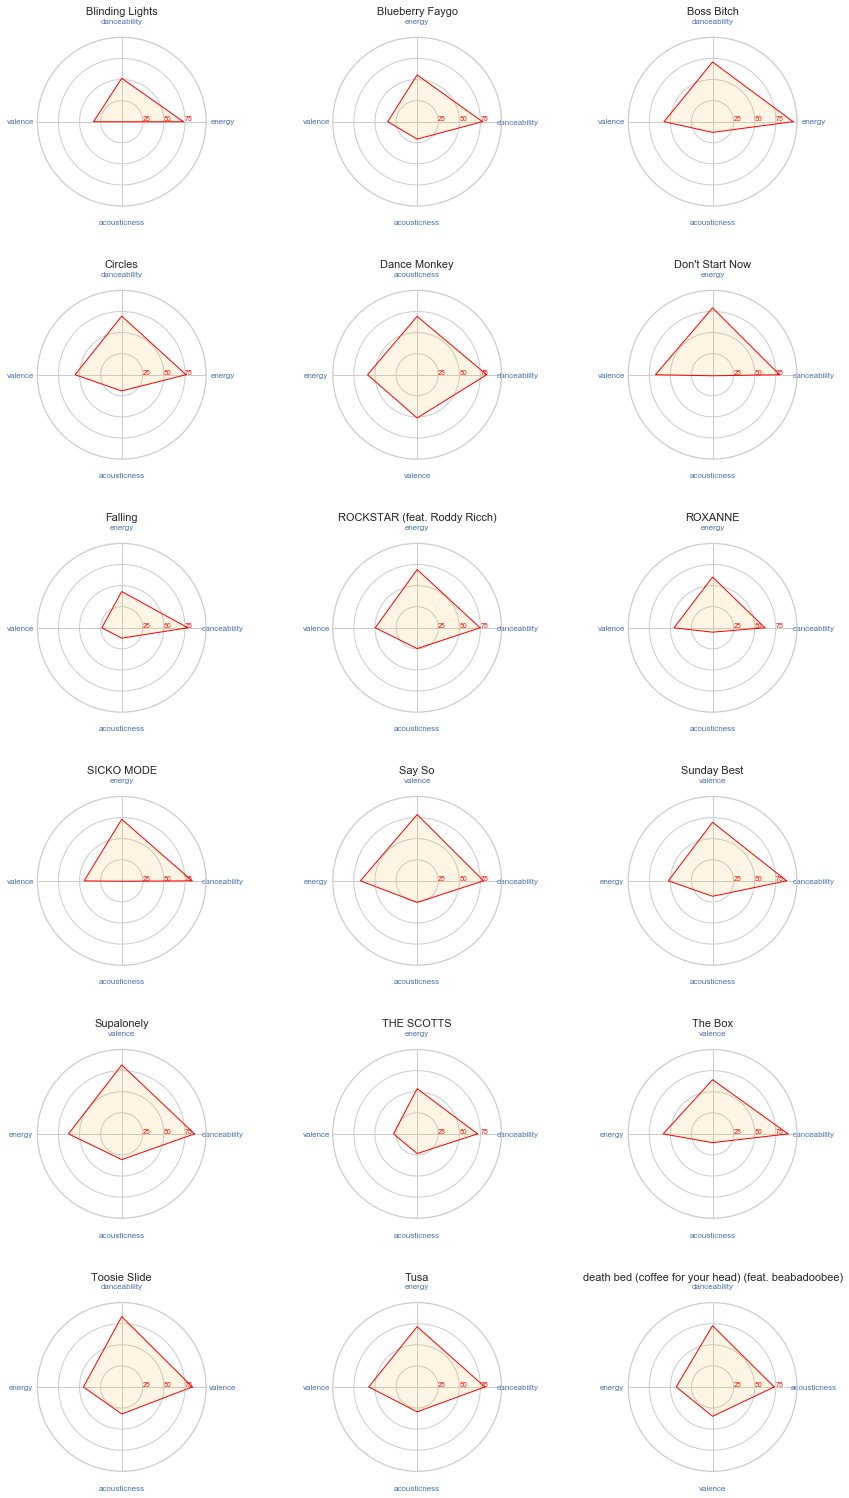

In [12]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for music_name, features in df_topPopular.groupby(df_topPopular['name'])[music_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(10, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='b', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="red", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid', color = 'red')

    # Fill area
    ax.fill(angles, values, 'orange', alpha=0.1)
    
    plt.title(music_name, size=11, y=1.1)
    
    idx += 1

Com base nos gráficos plotados acima, que relacionam as quantidades, em porcentagem, de cada _feature_ das músicas mais populares, podemos perceber alguns padrões:

* Todos, sem exceção, tem porcentagem de _danceability_ alto.


* Com exceção de _death bed_ e _Dance Monkey_, os valores de _acousitcness_ são predominantemente baixos. Em alguns caso é quase que inexistente! 


* Os outros valores oscilam muito. _Energy_ tem valores em geral medianos, sendo mais ou menos 50% em muitas músicas mas em outras assume valores mais altos.


Considerando tudo isso, talvez _danceability_ e _acousticness_ sejam  ótimas variáveis explicativas para prever a popularidade, enquanto que outras como _energy_ **TALVEZ** sejam boas para a predição.

___
## **Análise das _audio features_**

Para entender melhor cada variável explicativa, pota-se um gráfico que demonstra a média de cada _audio feature_ ao longo dos anos:

Text(0.5, 0, 'Ano')

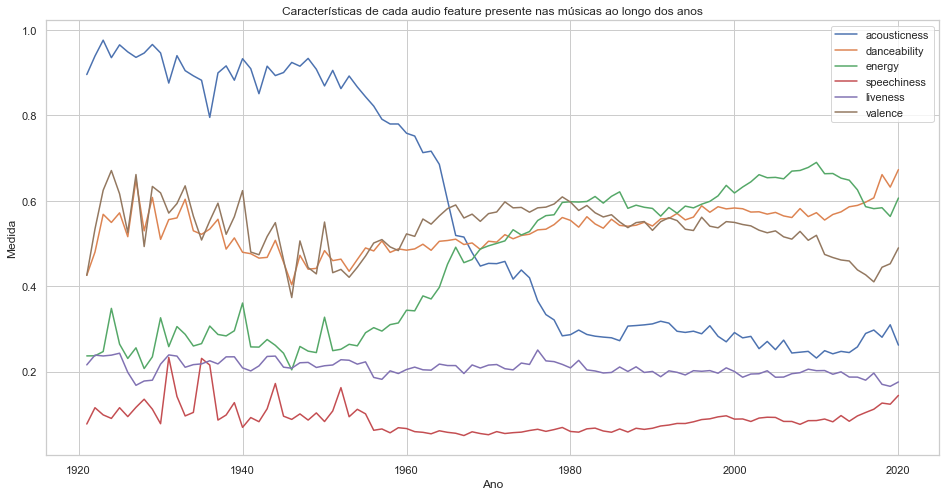

In [13]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Características de cada audio feature presente nas músicas ao longo dos anos')
ax.set_ylabel('Medida')
ax.set_xlabel('Ano')

Como pontos notáveis do gráfico acima, nota-se:

* As _audio features_ mais presentes nas músicas dos últimos anos são as mesmas que as _features_ mais presente em músicas populares (_energy_ e _danceability_, conforme demonstrado durante a análise de correlação entre colunas). Portanto, pode-se fazer a hipótese de que **músicas populares recentes** agregam a cultura geral de músicas da época, portanto, suas _features_ serão as predominantes em certo ano (dos mais recentes!).

* A variável _acousticness_ é bem menos presente nas músicas dos dias de hoje em comparação com antigamente, sendo até a audio feature  mais utilizada nas músicas antigas (de 1920 até 1960 mais ou menos, foi a variável com mudança mais acentuada ao longo dos anos). Essa informação casa com a ausência de relação linear entre _popularity_ e _acousticness_ percebida na matriz plotada no começo dessa análise exploratória. Uma possível explicação disso seria a hipótese que fizemos no primeiro tópico: como músicas populares não tem muita acusticidade, faz sentido que menos músicas com muita _acousticness_ sejam lançadas. 

* A outra _audio feature_ que passou por uma mudança mais radical no uso das músicas foi a _energy_. Uma das variáveis mais correlacionadas com a popularidade, faz sentido que a média de seu uso nas músicas de cada ano seja maior, seguindo a lógiva da hipótese que fizemos no primeiro tópico.

* As outras variáveis, (_speechiness_, _liveness_,  _danceability_ e _valence_) se mantiveram mais ou menos constantes ao longo dos anos. Inclusive, nota-se que as médias de uso nas músicas de _danceability_ e _valence_ eram muito parecidas antigamente, coisa que não acontece mais atualmente.

Portanto, considerando os pontos levantados acima, talvez seja mais interessante analisar os dados por décadas para obter uma melhor predição. Isso se deve, principalmente, devido ao fato de que as _audio features_ mudam muito de 1921 até 2020. Analisando os dados por década, a predição seria mais confiável, pois nosso modelo aprenderá com dados recentes com a data de cada música, que, por sua vez, serão mais fiéis para classificar popularidade.

___
# Definição de variáveis explicativas

Depois de concluir a nossa análise exploratória, podemos já definir quais serão as nossas variáveis explicativas, que utilizaremos para obter nossa variável resposta! Assim, temos: 

* **Variáveis Explicativas** -> _year_, _acousticness_, _danceability_, _energy_, _loudness_ e _explicit_.


* **Variável Resposta** -> _popularity_.

___
# Limpeza do Dataframe

Com base nas conclusões dissertadas acima, vamos fazer um classificador para as músicas da última década (2010-2020). 

Vamos criar um _Dataframe_ que tem os dados ordenados crescentemente de acordo com o ano de lançamento a música e com as colunas julgadas interessantes de acordo com a análise exploratória. Isso vai nos ajudar futuramente a filtrar os dados de músicas apenas de 2010 a 2020, haja visto que o nosso _Dataframe_ original não está ordenado da forma que queremos.

In [14]:
lista_colunas = ['year', 'acousticness', 'energy', 'loudness', 'explicit', 'danceability', 'popularity']
df_yearSorted = df.sort_values(by=['year'])
df_yearSorted = df_yearSorted.loc[:, lista_colunas]
df_yearSorted.head()

,year,acousticness,energy,loudness,explicit,danceability,popularity
0,1921,0.732,0.3410,-12.441,0,0.819,8
93,1921,0.104,0.3290,-11.636,1,0.605,0
92,1921,0.950,0.1380,-15.683,0,0.607,1
91,1921,0.994,0.0536,-28.147,0,0.263,0
90,1921,0.992,0.2750,-18.119,0,0.546,0


Agora, vamos "pegar" apenas os dados de músicas de 2010 para cima.

In [15]:
df_yearSorted = df_yearSorted.loc[df_yearSorted.year >= 2010, :]
df_yearSorted.head()

,year,acousticness,energy,loudness,explicit,danceability,popularity
160220,2010,0.186000,0.608,-5.290,0,0.552,42
160221,2010,0.015200,0.843,-8.343,1,0.613,44
160222,2010,0.033400,0.677,-5.699,1,0.489,43
160223,2010,0.000386,0.946,-5.014,0,0.394,46
160224,2010,0.060400,0.856,-5.148,1,0.474,45


Vamos "arrumar" o index de nosso _Dataframe_.

In [16]:
corrige_index(df_yearSorted)
df_yearSorted.head()

,year,acousticness,energy,loudness,explicit,danceability,popularity
0,2010,0.186000,0.608,-5.290,0,0.552,42
1,2010,0.015200,0.843,-8.343,1,0.613,44
2,2010,0.033400,0.677,-5.699,1,0.489,43
3,2010,0.000386,0.946,-5.014,0,0.394,46
4,2010,0.060400,0.856,-5.148,1,0.474,45


Podemos ver já que o tamanho de nosso _Dataframe_ diminuiu drasticamente no número de linhas. Antes, tinha mais de 160.000 linhas, agora tem 21.470! Isso é um fator até positivo de certa forma, pois o risco de _memory overload_ utilizando um _Dataframe_ tão grande que nem o anterior era muito maior.

In [17]:
df_yearSorted.shape

(21470, 7)

Além de criar o _Dataframe_ principal a ser utilizado, vamos criar _Dataframes_ individuais para cada variável explicativa de interesse para caso precisemos.

In [18]:
# Cria os Dataframes com as colunas que nos interessam. 

lista_colunas = ['year', 'energy', 'loudness', 'explicit', 'danceability']
for i in lista_colunas:
    df_string = 'df_'
    column_string = i
    x = df.loc[:, [i]]
    globals()[df_string+column_string] = x

O código acima cria todos os _Dataframes_ desejados. Plota-se um aqui para servir de exemplo.

In [19]:
df_energy.head()

,energy
0,0.341
1,0.211
2,0.203
3,0.211
4,0.193


___
# **Random Forest**

## Explicação 

![title](RF.png)

- Fonte: https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png

O Random Forest é um método em que árvores de decisão são utilizadas para prever uma variável. Para cada previsão, no nosso caso, para cada linha de nosso _Dataframe_ (cada música), sua popularidade é prevista criando uma árvore que cria múltiplas instâncias de nós, sendo cada nó uma condição a ser verificada. Assim, diversas árvores são criadas no final do processo com seus respectivos resultados, sendo a previsão final obtida ou por meio da média dos resultados ou por meio de uma "votação" geral que elege qual árvore tem o melhor resultado.

## Implementação

O primeiro método que iremos utilizar será o Random Forest. Primeiramente, temos que definir o que serão as _features_ (variáveis explicativas) que serão utilizadas para prever os _labels_ (variável resposta). Sendo assim, as nossas features, como já foi explicado, serão as variáveis filtradas do _Dataframe_, e os _labels_ serão os valores de popuaridade das músicas.

In [20]:
labels = df_yearSorted.popularity

O _Dataframe_ das _features_ será o _Dataframe_ principal criado na limpeza, com exceção da coluna _popularity_, que é nossa variável resposta.

In [21]:
df_features = df_yearSorted.drop('popularity', axis=1)
df_features.head()

,year,acousticness,energy,loudness,explicit,danceability
0,2010,0.186000,0.608,-5.290,0,0.552
1,2010,0.015200,0.843,-8.343,1,0.613
2,2010,0.033400,0.677,-5.699,1,0.489
3,2010,0.000386,0.946,-5.014,0,0.394
4,2010,0.060400,0.856,-5.148,1,0.474


Para separar o nosso _Dataframe_ em base de treinamento, em que "ensinamos" nosso modelo como classificar a popularidade de uma música (variável resposta) com base nas _audio features_ escolhidas (variável explicativa), mostrando para ele a "resposta". Depois, separamos ele com a base teste, em que ocultamos a variável resposta de popularidade e pedimos para ele classificar a popularidade com base no que foi aprendido com a base de treinamento! Para esse _Dataframe_ separamos 75% dos valores para base de treinamento e os outros 25% restantes para a base de teste.

In [22]:
from sklearn.model_selection import train_test_split

# Separando as bases de treinamento e teste
train_features, test_features, train_labels, test_labels = train_test_split(df_features, labels, test_size = 0.25, random_state = 42)

In [23]:
print("Tamanho = (número de linhas, número de colunas)")
print('Base de treinamento com feaatures tamanho:', train_features.shape)
print('Base de treinamento com labels tamanho:', train_labels.shape)
print('Base de teste com features tamanho:', test_features.shape)
print('Base de teste com labels tamanho:', test_labels.shape)

Tamanho = (número de linhas, número de colunas)
Base de treinamento com feaatures tamanho: (16102, 6)
Base de treinamento com labels tamanho: (16102,)
Base de teste com features tamanho: (5368, 6)
Base de teste com labels tamanho: (5368,)


Treinando o modelo:

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Criando modelo utilizando 1000 trees 
rf = RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs = -1)

# Treinando nosso modelo
rf.fit(train_features, train_labels);

Pedindo para o modelo classificar o _test_ e _train labels_ usando o _test_ e _train features_.

In [25]:
# Utilizando o método de predição random forest para prever test e train features
predictions = rf.predict(test_features)
predictions_train = rf.predict(train_features)

Criando _Dataframe_ para comparar valores preditos e os reais com o método _Random Forest_ para ambas bases (de teste e de treinamento).

In [26]:
df_test = pd.DataFrame({'Previsão Random Forest' : predictions, 'Valor Real' : test_labels})
df_test['Previsão Random Forest'] = df_test['Previsão Random Forest'].round(decimals=2)
corrige_index(df_test)
df_test.head()

,Previsão Random Forest,Valor Real
0,55.65,54
1,52.62,51
2,55.52,51
3,61.24,55
4,53.52,49


In [27]:
df_train = pd.DataFrame({'Previsão Random Forest' : predictions_train, 'Valor Real' : train_labels})
df_train['Previsão Random Forest'] = df_train['Previsão Random Forest'].round(decimals=2)
df_train.head()

,Previsão Random Forest,Valor Real
17130,60.32,57
1836,50.85,50
21177,66.86,69
9129,65.24,69
18842,69.02,68


## **Verificação de performance**

Vamos cálcular primeiro o coeficiente de determinação com os valores dos testes e de treinamento. Esse coeficiente nos diz o quanto o nosso modelo é eficiente para prever os dados de popularidade. É um valor dado em porcentagem e quanto mais próximo de 1, mais preciso é.

In [28]:
from sklearn import metrics
r2_rf_test = metrics.r2_score(df_test['Valor Real'], df_test['Previsão Random Forest'])
print("Valor de R² para a base de testes: {0}".format(r2_rf_test))

Valor de R² para a base de testes: 0.3975617364519174


Agora precisamos fazer o nosso modelo prever os dados da base de treinamento, ou seja, realizar o mesmo processo que fez para a base de testes.

In [29]:
r2_rf_train = metrics.r2_score(df_train['Valor Real'], df_train['Previsão Random Forest'])
print("Valor de R² para a base de treinamento: {0}".format(r2_rf_train))

Valor de R² para a base de treinamento: 0.9051191317522569


Calculando a média de erro absoluto, que representa a diferença entre os valores preditos e os reais:

In [30]:
# Calculando erros absolutos.
errors = abs(df_test['Previsão Random Forest'] - df_test['Valor Real'])

print('Média de erro absoluto:', round(np.mean(errors), 2), 'popularidade.')

Média de erro absoluto: 6.23 popularidade.


Agora, para calcular a acurácia desse modelo, vamos utilizar o método _Mean Absolute Percentage Error (MAPE)_, que é a média porcental dos erros absolutos calculados acima. O intuito de calculá-lo é obter uma outra forma de verificar a performance de nosso modelo e enriquecer a discussão, pois na verdade este método nem é 100% preciso já que alguns valores são descartados como será descrito a seguir.

![title](MAPE.png)

No entanto, temos um problema: por envolver a razão dos erros absolutos pelos valores reais de popularidade e também graças ao número de músicas no _Dataframe_ que criamos, que é mais de 2000, se não dividirmos os dados em _chunks_, o resultado sempre será infinito (inf). Por isso, vamos dividi-lo em partes, calcular acurácia individual de cada _chunk_ e finalmente calcular a média das acurácias.

Como o tamanho do _Dataframe_ que estamos trabalhando é 5368, vamos dividir os _chunks_ para cada um ter 61 elementos (que é o maior divisor de 5368), resultando em 88 _chunks_.

In [31]:
df_test.shape

(5368, 2)

In [32]:
lista_acuracia = calcula_acuracia_individual(errors, df_test['Valor Real'], 61)

In [33]:
print(lista_acuracia)

[89.28863954216561, -inf, 90.89788769284542, 89.79821612672808, 83.7441748347828, 65.27713276703255, 90.91879145758261, 90.70819052214351, 84.39070121183805, 68.46840543961306, 56.31484766208133, 88.18545572051445, 89.25075227105934, 84.58142898017059, 90.38800977570767, 89.06878002558109, 85.73481956282566, -10.665291553181348, 76.31502180182571, 91.30702256560957, 84.99792920473115, 60.556316152576684, 81.46701288829908, 80.3626362687956, 88.88246805642316, 88.33029697777982, 25.59808004494542, 53.724522033648235, 86.7344331357318, 39.86427662936228, 75.52126400303335, 72.64435160973248, -inf, 77.80002045282649, 91.42278735770546, 89.09971849911172, 89.75531811172122, 87.27812351886983, 88.99868530375137, 14.277424933032705, 90.91106387367338, 91.11141763870535, 88.81675151155844, 74.86350642432734, 90.35729672434208, -inf, 88.93073995080417, 51.90096209179737, 90.74599175335652, 90.66018575616147, -inf, 89.78300455773594, 87.1915458457639, 90.84463052630517, 89.66710278373499, 87.15

Note que mesmo divindo o _Dataframe_ em valores menores, ainda há valores de acurácia que dão inf. Como já foi pincelado acima, isso é um dos motivos que torna esse método um pouco impreciso, mesmo assim, é uma forma de termos uma outra noção da acurácia de nosso modelo. Portanto, vamos filtrá-los.

In [34]:
acuracia_filtrada = []
for i in lista_acuracia:
    if math.isnan(i) == False | math.isinf(i) == False:
        acuracia_filtrada.append(i)

In [35]:
print(acuracia_filtrada)

[89.28863954216561, 90.89788769284542, 89.79821612672808, 83.7441748347828, 65.27713276703255, 90.91879145758261, 90.70819052214351, 84.39070121183805, 68.46840543961306, 56.31484766208133, 88.18545572051445, 89.25075227105934, 84.58142898017059, 90.38800977570767, 89.06878002558109, 85.73481956282566, -10.665291553181348, 76.31502180182571, 91.30702256560957, 84.99792920473115, 60.556316152576684, 81.46701288829908, 80.3626362687956, 88.88246805642316, 88.33029697777982, 25.59808004494542, 53.724522033648235, 86.7344331357318, 39.86427662936228, 75.52126400303335, 72.64435160973248, 77.80002045282649, 91.42278735770546, 89.09971849911172, 89.75531811172122, 87.27812351886983, 88.99868530375137, 14.277424933032705, 90.91106387367338, 91.11141763870535, 88.81675151155844, 74.86350642432734, 90.35729672434208, 88.93073995080417, 51.90096209179737, 90.74599175335652, 90.66018575616147, 89.78300455773594, 87.1915458457639, 90.84463052630517, 89.66710278373499, 87.15075139510573, 89.8663736

Com isso, conseguimos calcular a média dessa lista e descobrir a acurácia de nosso modelo.

In [36]:
acuracia_rf = sum(acuracia_filtrada)/len(acuracia_filtrada)
print("Acurácia do modelo:", round(acuracia_rf, 2), "%")

Acurácia do modelo: 78.35 %


Agora, vamos repetir esse cálculo só que para a base de testes!

In [37]:
# Calculando erros absolutos.
errors = abs(df_train['Previsão Random Forest'] - df_train['Valor Real'])

print('Média de erro absoluto:', round(np.mean(errors), 2), 'popularidade.')

Média de erro absoluto: 2.37 popularidade.


In [38]:
df_train.shape

(16102, 2)

Seguindo a mesma linha de raciocínio utilizada para a base de teste, o maior divisor de 16102 é 97. Portanto...

In [39]:
lista_acuracia = calcula_acuracia_individual(errors, df_train['Valor Real'], 97)
print(lista_acuracia)

[95.6681441601746, 87.41004839058317, 90.82832920852735, 96.4694049490528, 95.857707949717, 96.2064584921771, 95.82647207223386, 96.6794816036663, -inf, 96.29498296353614, 73.9864456575818, 91.43840883503928, 89.03897993445895, 85.24709247212562, 82.97336881427154, 96.0629137115865, 69.10994961554185, 88.47620634932954, 96.4734998697198, -inf, 89.7810795611497, 95.44891768336163, 95.96567765016076, 95.80315195925212, 92.54134055358946, 96.50134625223177, -inf, 92.40971663485651, 79.74094823462174, 95.0164253876139, 95.87365703525705, 89.00046451428322, 96.51720611620782, 95.93163271295577, -inf, 96.09026792216909, 84.18104534970234, 96.03242720942733, 80.36079762878357, 96.11997259456541, 96.50771658787605, 91.0847691110993, 96.50953318530861, 94.7208702207013, 82.51248882686681, 88.09692472034772, 74.86259557235326, 95.92561640721839, 87.36358304213485, -inf, 66.98548158677696, -inf, 96.17684410939688, 95.84667291749801, 95.8273668071114, -inf, 88.9296421119836, 96.34603598525189, -in

In [40]:
acuracia_filtrada = []
for i in lista_acuracia:
    if math.isnan(i) == False | math.isinf(i) == False:
        acuracia_filtrada.append(i)
        
print(acuracia_filtrada)

[95.6681441601746, 87.41004839058317, 90.82832920852735, 96.4694049490528, 95.857707949717, 96.2064584921771, 95.82647207223386, 96.6794816036663, 96.29498296353614, 73.9864456575818, 91.43840883503928, 89.03897993445895, 85.24709247212562, 82.97336881427154, 96.0629137115865, 69.10994961554185, 88.47620634932954, 96.4734998697198, 89.7810795611497, 95.44891768336163, 95.96567765016076, 95.80315195925212, 92.54134055358946, 96.50134625223177, 92.40971663485651, 79.74094823462174, 95.0164253876139, 95.87365703525705, 89.00046451428322, 96.51720611620782, 95.93163271295577, 96.09026792216909, 84.18104534970234, 96.03242720942733, 80.36079762878357, 96.11997259456541, 96.50771658787605, 91.0847691110993, 96.50953318530861, 94.7208702207013, 82.51248882686681, 88.09692472034772, 74.86259557235326, 95.92561640721839, 87.36358304213485, 66.98548158677696, 96.17684410939688, 95.84667291749801, 95.8273668071114, 88.9296421119836, 96.34603598525189, 87.95377373137882, 93.48078083607767, 94.3319

In [41]:
acuracia_rf_train = sum(acuracia_filtrada)/len(acuracia_filtrada)
print("Acurácia do modelo:", round(acuracia_rf_train, 2), "%")

Acurácia do modelo: 90.63 %


Agora, com todos os dados em mãos, vamos criar o _Dataframe_ dos resultados, que vai nos ajudar futuramente.

In [42]:
index=['Random Forest']
df_results = pd.DataFrame({'R² (teste)': r2_rf_test,
                           'R² (treinamento)': r2_rf_train,
                           'MAPE (teste)': acuracia_rf,
                           'MAPE (treinamento)': acuracia_rf_train},
                            index=['Random Forest'])
df_results

,R² (teste),R² (treinamento),MAPE (teste),MAPE (treinamento)
Random Forest,0.397562,0.905119,78.352703,90.626807


Observando os resultados obtidos, podemos perceber que há uma discrepância notável em relação aos resultados obtidos na base de teste e treinamento. Isto é, os valores previstos para a popularidade utilizando a base de testes teve uma acurácia bem menor, em relação a R2 e também do MAPE, do que com a de treinamento. O grupo investigou as possíveis causas para isso e pode ser que seja um problema de _model overfitting_, que consiste basicamente em um problema que ocorre quando um modelo tem uma ótima previsão para os dados da base de treinamento, que foram os valores com os quais ele "aprendeu", mas tem uma performance muito mais pobres com novos valores, que são os dados da base de teste. O grupo tentou variar valores de algumas variáveis como _random state_, dar um _shuffle_ nas linhas do _Dataframe_ antes de mas não adiantou, o problema persistiu com alterações de resultados ligeiramente diferentes

A solução que iremos implementar para tentar resolver o problema que julgamos talvez ser de  _overfitting_  será  a _k-fold cross validation_. Tal solução consiste basicamente de dividir o _Dataset_ em uma parte de treino e outra de teste, como já fazíamos, mas agora a divisão é feita em um número k de _folds_ de mesmo tamanho. Sendo assim, o modelo é validado com apenas um a _fold_ e as k-1 remanescentes são utilizadas para treinar o modelo. Dessa forma, teoricamente, evita-se uma classificação "parcial" do modelo como talvez tenha ocorrido anteriormente, pois os valores com os quais é treinado são aleatórios e assim podemos testar sua performance de maneira mais confiável. 

Primeiro, vamos copiar o _Dataframe_ com as nossas informações.

In [43]:
df_kfold = df_yearSorted.copy()
df_kfold = df_kfold.sample(frac=1).reset_index(drop=True)
df_kfold.head()

,year,acousticness,energy,loudness,explicit,danceability,popularity
0,2017,0.13900,0.852,-4.965,1,0.261,61
1,2019,0.55100,0.710,-3.210,0,0.786,63
2,2019,0.00563,0.850,-5.372,0,0.499,62
3,2014,0.40800,0.603,-6.981,0,0.602,50
4,2014,0.21400,0.736,-6.797,1,0.840,51


Agora, vamos definir as features (variáveis explicativas) como X e os labels como y (variável resposta _popularity_). Também importamos a biblioteca do sklearn.model_selection que fará o split para nós.

In [44]:
from sklearn.model_selection import KFold
y = df_kfold.popularity
X = df_kfold.drop('popularity', axis=1)

Para o número de splits, definimos 10 por ser um número que comprovadamente por experimentos mostra uma menor "parcialidade". Vamos calcular, então, 10 valores de R2 e ao final calcular a média deles e verificar se o problema dos resultados de teste e treinamento terem performance diferentes persiste. Não iremos calcular o MAPE com esse método, pois estamos focando na discrepâncai entre os valores de R2.

In [45]:
# Definindo número de splits
kf = KFold(n_splits=10,shuffle=True)
kf.split(X)    
     
# Listas nas quais guardaremos cada R2 calculado para cada split.
accuracy_model_test = []
accuracy_model_train = []
 
for train_index, test_index in kf.split(X):
    # Divisão dos Datasets de treinamento e teste.
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Treinando o modelo utilizando o Random Forest.
    model = rf.fit(X_train, y_train)
    
    # Adicionando às listas e imprimindo os indexes de teste e treinamento. 
    accuracy_model_test.append(metrics.r2_score(y_test, model.predict(X_test)))
    accuracy_model_train.append(metrics.r2_score(y_train, model.predict(X_train)))
    print("Index de train: {}".format(train_index))
    print("Index de test: {}".format(test_index))
 
r2_rf_kfold_test = np.mean(accuracy_model_test)
r2_rf_kfold_train = np.mean(accuracy_model_train)

print("Média de R2 para teste: {}".format(r2_rf_kfold_test))
print("Média de R2 para treino: {}".format(r2_rf_kfold_train))

Index de train: [    0     1     3 ... 21467 21468 21469]
Index de test: [    2     5    12 ... 21444 21456 21458]
Index de train: [    1     2     3 ... 21467 21468 21469]
Index de test: [    0     8    32 ... 21453 21457 21465]
Index de train: [    0     1     2 ... 21466 21467 21468]
Index de test: [    3     7    30 ... 21440 21451 21469]
Index de train: [    0     1     2 ... 21467 21468 21469]
Index de test: [   13    29    35 ... 21455 21462 21463]
Index de train: [    0     2     3 ... 21467 21468 21469]
Index de test: [    1    11    14 ... 21424 21433 21445]
Index de train: [    0     1     2 ... 21467 21468 21469]
Index de test: [   24    25    38 ... 21430 21460 21464]
Index de train: [    0     1     2 ... 21467 21468 21469]
Index de test: [    4    17    22 ... 21442 21448 21459]
Index de train: [    0     1     2 ... 21467 21468 21469]
Index de test: [    9    10    16 ... 21449 21454 21466]
Index de train: [    0     1     2 ... 21467 21468 21469]
Index de test: [   23 

In [46]:
df_results = adiciona_linha_resultados(df_results, 'Random Forest (K-fold Cross)', r2_rf_kfold_test, r2_rf_kfold_train,'-', '-')

Podemos ver que o problema ainda persiste. Portanto, a conclusão que o grupo chegou foi a de que, mesmo dando ao modelo dados aleatórios e divididos em folds, ele sempre irá ter uma performance melhor na base de treinamento porque foram com esses dados que ele aprendeu a classificar a popularidade. Talvez isso ocorra devido à natureza imprevisível de nosso _Dataframe_, pois mesmo que uma música tenha todas as _features_ que a caracterizem como sendo popular, por exemplo, isso não necessáriamente se confirmará. Há muitos exemplos de músicas que não bombam por serem de artistas menores mas que tem um estilo de  música _pop_, ou seja, as mesmas _features_ que músicas populares. O oposto também pode ocorrer: um artista popular lança uma música mais alternativa, que não corresponde ao seu estilo habitual, e essa música vai se tornar popular graças à popularidade do artista, e, não graças às características da música.  

Finalmente, vamos ver quanto de influência cada variável explicativa exerceu na previsão da popularidade (OBS: código extraído de [3], disponível em **Referências**).

In [47]:
# Saving feature names for later use
feature_list = list(df_features.columns)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: year                 Importance: 0.26
Variable: energy               Importance: 0.18
Variable: acousticness         Importance: 0.17
Variable: loudness             Importance: 0.17
Variable: danceability         Importance: 0.17
Variable: explicit             Importance: 0.06


Podemos observar que os pesos de cada variável explicativa batem com os valores de correlações vistos durante a análise de correlação entre colunas. 


* _year_ teve maior peso, sua correlação era 0.88 com popularidade, o maior valor da matriz;


* _explicit_ continua tendo peso para prever popularidade, mas surpreendemente foi menor do que o valor de _loudness_, que tinha valor de correlação de quase 0 com popularidade;


* Outra supresa foi _energy_ ter amior relevância do que _acousticness_, sendo que o _acousticness_ tinha -0.6 de correlção com popularidade enquanto que _energy_ tinha aproximadamente 0.5.


Talvez tivemos essas pequenas supresas, pois os valores da matriz analisam as correlações de todos os dados (1921-2020), enquanto que estamos apenas trabalhando com dados da última década.

# Regressão Linear Múltipla

## Explicação

O modelo de regressão linear múltipla associa um valor n de variáveis dependentes (explicativas) com uma variável independente (variável resposta). Dessa forma, a fórmula geral de uma regressão linear múltipla é a seguinte:

![title](MultipleLinearRegression.png)

- Fonte: https://www.scribbr.com/statistics/multiple-linear-regression/ 

Em que:

* y será o valor da variável resposta estimada;


* β0 será o intercepto da reta criada pela regressão (quando o valor de todas as variáveis explicativas é 0);


* β1 será o valor do coeficiente da primeira variável explicativa. Cada variável dependente tem um coeficiente;


* X1 será o valor da variável explicativa. Cada variável dependente tem um valor;


* Os valores de β1 e X1 são apenas para a primeira variávele explicativa. Temos que associar a cada uma um valor, como demonstra a fórmula acima, em que n corresponde ao total de variáveis explciativas;


* e é o erro de cada estimativa de y, ou seja, será a diferença entre o valor real e o estimado para a variável resposta. 

Nesse método, o que essencialmente é feito é criar uma reta que melhor estima os valores de variável resposta com base nos valores de variáveis explicativas. Ou seja, uma reta que minimize os erros, essencialmente. A figura abaixo ilustra qualitativamente um exemplo de uma regressão linear para deixar mais claro. Os pontos são os valores reais, os erros são a diferença dos valores obtidos com a regressão com os valores reais.

![title](LinearRegression1.png)

## Implementação

Com o objetivo de obter o melhor modelo para prever a popularidade, vamos agora utilizar a regressão linear. Primeiramente, iremos importar a bilioteca statsmodels que consegue confeccionar a reta da regressão.

In [48]:
import statsmodels.api as sm # Importe da biblioteca

Vamos primeiramente dividir nosso _Dataframe_ em uma base de treinamento outra de testes.

In [49]:
# Separando as bases de treinamento e teste
train_features, test_features, train_labels, test_labels = train_test_split(df_features, labels, test_size = 0.25, random_state = 42)

Agora, vamos definir nossos dados explicativos, que serão as _features_, pegando os dados de um _Dataframe_ que já foi definido  previamente durante a implementação do Random Forest. Além disso, també é necessário usar a função add_constant de sm da biblioteca que importamos, para multiplicar os interceptos por um e compor beta 0.

In [50]:
# Repetindo - mas já fizemos isso anteriormente
x_dados = train_features # Definindo renda como explicativa
y_dados = train_labels    # Definindo CO2 como resposta

# Matriz de 1s e valores de x_dados
X_dados = sm.add_constant(x_dados) # Adiciona coluna de 1s para estimar intercepto junto com a coluna de x (dados), para compor 
                                   # beta0

Com isso, primeiro treinamos nosso modelo com a base de treinamento.

In [51]:
# Define o modelo
model = sm.OLS(y_dados, X_dados) 

# Faz o ajuste
results = model.fit()   

# Mostra os resultados
results.summary()       

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     522.1
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:25:23   Log-Likelihood:                -60322.
No. Observations:               16102   AIC:                         1.207e+05
Df Residuals:                   16095   BIC:                         1.207e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2556.3587     54.764    -46.680      0.000   -2663.702   -2449.016
year             1.3001      0.027     47.825      0.000       1.247       1.353
acousticness    -1.0452      0.389     -2.684      0.007      -1.808      -0.282
energy          -5.4482      0.617     -8.837      0.000      -6.657      -4.240
loudness         0.1518      0.026      5.881      0.000       0.101       0.202
explicit         1.6512      0.192      8.618      0.000       1.276       2.027
danceability     0.6654      0.547      1.216      0.224      -0.407       1.738
==============================================================================
Omnibus:                     9605.251   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           168473.475
Skew:                          -2.538   Prob(JB):                         0.00
Kurtosis:                      18.012   Cond. No.                     1.37e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vamos analisar os dados que obtivemos com o comando `results.summary()`. A coluna P(t) nos mostra os valores-p obtidos de cada variável explicativa. Sendo esse valor menor do que o nível de significância, que, o adotado na prática é 10%, a variável é considerada relevante para prever a popularidade. No nosso caso, TODAS as variáveis têm valor-p menor do que 10% menos danceability, indicando que fizemos uma boa filtragem de dados durante a análise exploratória! Como há mais de uma variável que se mostrou relevante para a classificação, um gráfico 3D não seria relevante.

Agora, vamos recuperar os dados de intercepto e coeficientes obtidos.

In [52]:
beta0 = results.params['const'].round(decimals=2)
beta1 = results.params['year'].round(decimals=2)
beta2 = results.params['acousticness'].round(decimals=2)
beta3 = results.params['energy'].round(decimals=2)
beta4 = results.params['loudness'].round(decimals=2)
beta5 = results.params['explicit'].round(decimals=2)
beta6 = results.params['danceability'].round(decimals=2)

print("Estimativa de beta0 (coeficente linear): {0}".format(beta0))
print("Estimativa de beta1 (coeficente angular): {0}".format(beta1))
print("Estimativa de beta2 (coeficente angular): {0}".format(beta2))
print("Estimativa de beta3 (coeficente angular): {0}".format(beta3))
print("Estimativa de beta4 (coeficente angular): {0}".format(beta4))
print("Estimativa de beta5 (coeficente angular): {0}".format(beta5))
print("Estimativa de beta6 (coeficente angular): {0}".format(beta6))

Estimativa de beta0 (coeficente linear): -2556.36
Estimativa de beta1 (coeficente angular): 1.3
Estimativa de beta2 (coeficente angular): -1.05
Estimativa de beta3 (coeficente angular): -5.45
Estimativa de beta4 (coeficente angular): 0.15
Estimativa de beta5 (coeficente angular): 1.65
Estimativa de beta6 (coeficente angular): 0.67


Com isso, é possível substituir esses valores na fórmula da regressão linear múltipla que apresentamos previamente, conforme demonstrado abaixo.

$$y_i=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\beta_4x_4+\beta_5x_5+\beta_6x_6+\varepsilon_i$$

$$y_i=-2556.36+1.3\cdot x_1+(-1.05)\cdot x_2+(-5.45)\cdot x_3+0.15\cdot x_4+1.65\cdot x_5+0.67\cdot x_6+\varepsilon_i$$

Com isso, é possível interpretar os coeficientes beta obtidos. Se o coeficiente obtido é negativo, isso quer dizer que a variável explicativa é **inversamente proporcional** a variável resposta popularidade. Sendo assim, esse modelo está nos dizendo que quanto maior for _acousticness_ e _energy_, segundo esse modelo de regressão linear, menor vai ser a popularidade de uma música. Enquanto que isso faz sentido para a variável _acousticness_, que confirmamos na nossa análise de correlação entre colunas que tinha um valor negativo baixíssimo de correlação com popularidade, isso é uma surpresa para _energy_, que tinha valor de correlação positivo e alto para popularidade. No entanto, na nossa análise de popularidade de músicas do _Dataframe_, havíamos hipoptetizado que talvez _energy_ não fosse uma variável confiável para prever popularidade já que apareciad e forma imprevisível nas músicas mais populares, o que foi confirmado pelo nosso modelo de regressão linear múltipla. Dessa forma:

- Segundo o modelo de regressão linear múltipla, se a música conter palavrões (_explicit_) e quanto maior for suas _features_ de _year_, _loudness_ e _danceability_,  e quanto menor for _energy_ e _acousticness_, maior será sua popularidade! 

Agora, vamos testar o modelo de regressão linear múltipla com a nossa base de testes. Para isso, temos que adicionar a constante de 1's no _Dataframe_ de testes para compor o intercepto (beta0). Isso já tinha sido realizado antes, quando treinamos e analsamos o modelo. 

In [53]:
test_features = sm.add_constant(test_features)
predictions_test = results.predict(test_features)

Vamos calcular o valor de R2 da nossa base de testes.

In [54]:
r2_lr_test = metrics.r2_score(test_labels, predictions_test)
print("Valor de R² para a base de treinamento: {0}".format(r2_lr_test))

Valor de R² para a base de treinamento: 0.16409805948243894


Agora, repete-se o mesmo processo para obter a acurácia. Primeiramente os erros são calculados via módulo da diferença entre valores reais e previstos.

In [55]:
errors = abs(predictions_test - test_labels)
errors.head()

5557     1.188244
7646     5.894140
3018     1.939526
13644    7.006084
6220     9.031506
dtype: float64

In [56]:
errors.shape

(5368,)

Para serparar o _Dataframe_ e calcular as acurácias individuais, temos que utilizar um número divisível por 5368, que é o número de linhas do _Dataframe_. Por isso, vamos utilizar 61 (igual ao Random Forest), que não é um valor muito alto e evita que muitos valores infinitos sejam obtidos. (OBS: Não serão mostrados os resultados de `lista_acuracia` e `acuracia_filtrada`, uma vez que isso já foi feito no Random Forest, a fim de deixar o notebook mais limpo).

In [57]:
lista_acuracia = calcula_acuracia_individual(errors, test_labels, 61)

Filtrando valores `Nan` e `Inf`:

In [58]:
acuracia_filtrada = []
for i in lista_acuracia:
    if math.isnan(i) == False | math.isinf(i) == False:
        acuracia_filtrada.append(i)

A acurácia a total será a média das acurácias individuais. Portanto:

In [59]:
acuracia_lr_test = sum(acuracia_filtrada)/len(acuracia_filtrada)
print("Acurácia do modelo:", round(acuracia_lr_test, 2), "%")

Acurácia do modelo: 61.39 %


Vamos agora calcular esses valores para a base de treinamento.

In [60]:
train_features = sm.add_constant(train_features)
predictions_train = results.predict(train_features)

In [61]:
r2_lr_train = metrics.r2_score(train_labels, predictions_train)
print("Valor de R² para a base de treinamento: {0}".format(r2_lr_train))

Valor de R² para a base de treinamento: 0.16293444416603142


In [62]:
errors = abs(predictions_train - train_labels)
errors.head()

17130     7.207547
1836      2.582556
21177     2.930906
9129     12.420001
18842     1.371111
dtype: float64

In [63]:
errors.shape

(16102,)

In [64]:
lista_acuracia = calcula_acuracia_individual(errors, train_labels, 97)

In [65]:
acuracia_filtrada = []
for i in lista_acuracia:
    if math.isnan(i) == False | math.isinf(i) == False:
        acuracia_filtrada.append(i)

In [66]:
acuracia_lr_train = sum(acuracia_filtrada)/len(acuracia_filtrada)
print("Acurácia do modelo:", round(acuracia_lr_train, 2), "%")

Acurácia do modelo: 58.49 %


Finalmente, vamos adicionar esse valor ao nosso _Dataframe_ de resultados!

In [67]:
df_results = adiciona_linha_resultados(df_results, 'Multiple Linear Regression', r2_lr_test, r2_lr_train, acuracia_lr_test,\
                                       acuracia_lr_train)
df_results

,R² (teste),R² (treinamento),MAPE (teste),MAPE (treinamento)
Random Forest,0.397562,0.905119,78.3527,90.6268
Random Forest (K-fold Cross),0.375992,0.906526,-,-
Multiple Linear Regression,0.164098,0.162934,61.3949,58.4909


Ao passo que os valores de R2  e de acurácia via MAPE obtidos são menores, nota-se que a discrepância entre os valores da base de teste e de treinamento que ocorreram no modelo do Random Forest não existiu no modelo de regressão linear múltipla! Considerando que os passos tomados para separar a base de dados foram exatamente os mesmos, o motivo disso acontecer talvez seja porque modelos de regressão linear não se preocupa com condicionalidade. Isto é, enquanto que o Random Forest é uma árvore de decisão gigante com cada nó representando uma condição, talvez os _outputs_ da base de testes realmente tenham uma menor performance do que da base de treinamento devido à imprevisibilidade natural inerente à popularidade de cada música, sendo que um aspecto anômalo de uma música em comparação com a "regra geral" pode levar o modelo de Random Forest a resultados muito diferentes dos reais enquanto utiliza novos dados ao invés de valores jpa vistos. Mas como modelos de regressão linear não trabalham com condições e os resultados obtidos são lineares, ou seja, uma reta com os valores, faz mais sentido que ele não tenha tantas diferenças de performance na base de teste e de treinamento! 

Mesmo assim, o Random Forest ainda tem uma performance superior ao modelo de regressão linear. Para analisar o quão bem esse modelo é para prever a popularidade das músicas com base nas variáveis explicativas, vamos analisar a distribuição dos resíduos.

In [68]:
residuos = abs(results.resid)
residuos.head()

17130     7.207547
1836      2.582556
21177     2.930906
9129     12.420001
18842     1.371111
dtype: float64

C:\Users\matfs\Downloads\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


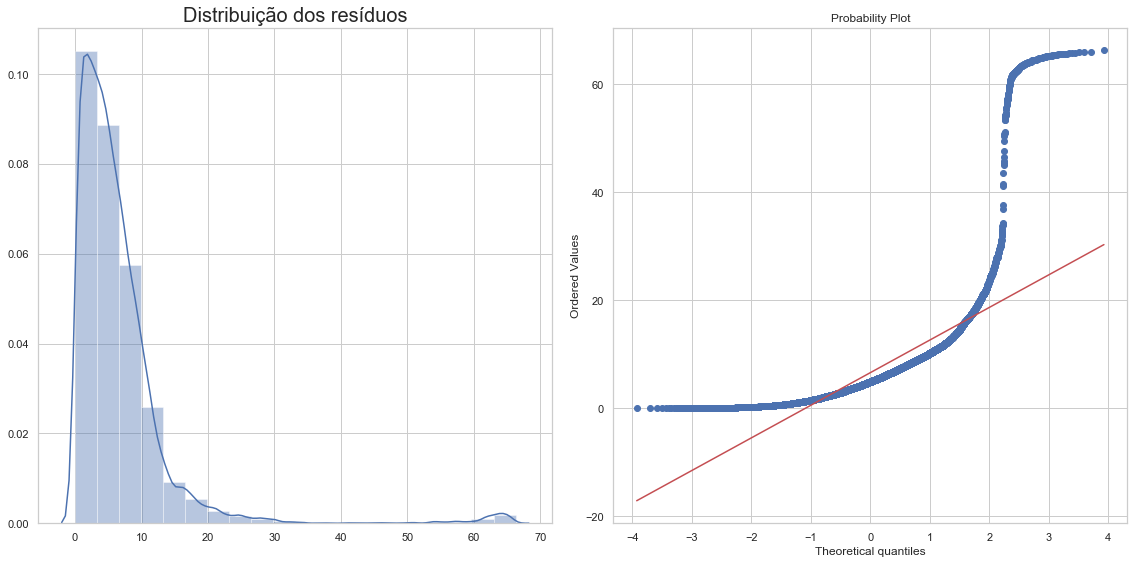

In [69]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
sns.distplot(residuos,bins=20)
plt.title('Distribuição dos resíduos', fontsize=20, ha='center')


plt.subplot(122)
stats.probplot(residuos, dist="norm", plot=plt)

plt.tight_layout()

Como suspeitamos pela acurácia baixa do modelo, podemos observar que ele sua distribuição não é muito similar a de uma normal. Isso quer dizer que ele não é muito útil para prever a popularidade! Como já foi explicado, o nosso Dataframe tem valores de popularidade que às vezes podem ser muito imprevisíveis, e talvez um modelo que toma em conta linearidadde e não condicionalidade não engloba a maioria dos casos de forma muito eficiente.

---
# Gradient Boosting Regression

## Explicação

Essa técnica consiste basicamente de combinar vários modelos de predição simples em um único modelo. Nele, _weak learners_ vão sendo adicionados individualmente, e os _learners_ que já existem no modelo permanecem intocados. à medida que vários "aprendizes" vão sendo incorporados, o modelo se torna um preditor cada vez mais forte. No _Gradient Boosting Regression_, os _weak learners_ são árvores de decisão. 

## Implementação

Como sempre, vamos separar nossa base de dados.

In [70]:
# Separando as bases de treinamento e teste
train_features, test_features, train_labels, test_labels = train_test_split(df_features, labels, test_size = 0.25, random_state = 42)

Importando a bibilioteca que rezlia o Graident Boosting Regressor e treinando nosso modelo com a base de treinamento.

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

gbr =  GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

Agora, testamos com a base de testes e calculamos o valor de R2 com esse modelo.

In [72]:
predictions_test = gbr.predict(test_features)

In [73]:
r2_gbr_test = metrics.r2_score(test_labels, predictions_test)
print("Valor de R² para a base de treinamento: {0}".format(r2_gbr_test))

Valor de R² para a base de treinamento: 0.32610998510244105


Finalmente, vamos calcular a acurácia via MAPE (esses passos já foram explicados, o que é feito aqui é o mesmo: calcula-se primeiro para a base de testes e depois para abase de treinamento).

In [74]:
errors = abs(predictions_test - test_labels)
errors.head()

5557     1.309632
7646     4.750658
3018     4.196901
13644    7.011269
6220     5.661752
Name: popularity, dtype: float64

In [75]:
errors.shape

(5368,)

In [76]:
lista_acuracia = calcula_acuracia_individual(errors, test_labels, 61)

In [77]:
acuracia_filtrada = []
for i in lista_acuracia:
    if math.isnan(i) == False | math.isinf(i) == False:
        acuracia_filtrada.append(i)

Obtendo acurácia para a base de testes.

In [78]:
acuracia_gbr_test = sum(acuracia_filtrada)/len(acuracia_filtrada)
print("Acurácia do modelo:", round(acuracia_gbr_test, 2), "%")

Acurácia do modelo: 68.08 %


In [79]:
predictions_train = gbr.predict(train_features)

Agora, fazemos o mesmo procedimento só que para a base de treinamento.

In [80]:
r2_gbr_train = metrics.r2_score(train_labels, predictions_train)
print("Valor de R² para a base de treinamento: {0}".format(r2_gbr_train))

Valor de R² para a base de treinamento: 0.31247119021239766


In [81]:
errors = abs(predictions_train - train_labels)
errors.head()

17130     9.582516
1836      3.457493
21177    15.152632
9129     11.515876
18842     5.156771
Name: popularity, dtype: float64

In [82]:
errors.shape

(16102,)

In [83]:
lista_acuracia = calcula_acuracia_individual(errors, train_labels, 97)

In [84]:
acuracia_filtrada = []
for i in lista_acuracia:
    if math.isnan(i) == False | math.isinf(i) == False:
        acuracia_filtrada.append(i)

In [85]:
acuracia_gbr_train = sum(acuracia_filtrada)/len(acuracia_filtrada)
print("Acurácia do modelo:", round(acuracia_gbr_train, 2), "%")

Acurácia do modelo: 65.9 %


Adiconando os valores ao _Dataframe_ de resultados:

In [86]:
df_results = adiciona_linha_resultados(df_results,'Gradient Boosting Regression', r2_gbr_test, r2_gbr_train, acuracia_gbr_test,\
                                       acuracia_gbr_train)
df_results

,R² (teste),R² (treinamento),MAPE (teste),MAPE (treinamento)
Random Forest,0.397562,0.905119,78.3527,90.6268
Random Forest (K-fold Cross),0.375992,0.906526,-,-
Multiple Linear Regression,0.164098,0.162934,61.3949,58.4909
Gradient Boosting Regression,0.326110,0.312471,68.0792,65.8973


O Gradient Boosting Regression teve valor de R2 e acurácia muito superiores comparado aos da regressão linear múltipla. Mesmo assim, sua acurácia foi menor do que a do Random Forest. Esse modelo e o Random Forest (na parte de teste) tiveram valores relativamente próximos de acurácia, isso talvez tenha acontecido porque o Gradient Boosting Regressor utiliza como _weak learners_ árvores de decisão! 

___
# Conclusão

Primeiramente, percebemos que para prever a popularidade de uma música seria melhor utilizar dados das músicas durante os últimos 10 anos ao invés dos últimos 100, pois as _audio features_ predominantes das músicas variaram muito ao longo das décadas, e, pegando um intervalo menor de daos, observamos que elas se mantêm mais constante e não teríamos esse problema de variação de características ao longo dos anos. A Paritr da análise de 4 modelos diferentes, concluimos que o melhor modelo para prever a popularidade de uma música da última década com base nas suas _features_ é o **Random Forest**! Esse modelo não só tem acurácias de MAPE e valores de R2  maiores que os outros, mas também se adequa mais ao nosso contexto, englobando mais casos variados. Por isso que o modelo de regressão linear não serviu para responder à nossa pergunta: ele não divide os casos de maneira eficiente. Faz uma aproximação por uma equação e não divide os casos anÔmalos que podem ocorrer, pois sempre utilizam a "mesma" forma de aproximar a popularidade. E considerando que, como discutido ao longo desse trabalho, a natureza de nosso _Dataframe_ é muito imprevisível, já que uma música que tem as características das músicas mais populares não necessariamente irá, por exemplo, é imprescindível que o modelo consiga lidar com esses casos mais atípicos. O Random Forest feito com o K-fold Cross Validation foi implementado com o objetivo de eliminar o problema de _overfitting_ do Random Forest, mas percebemos que na verdade a discrepância de performance do Random Forest na base de testes e treino ocorre graças ao problema de natureza imprevisível das informações, já que esse método ainda manteve os mesmos resultados,e  , assim, o modelo vai ter uma performance bem melhor como que aprendeu do que com base de dados nova. Um outro motivo do porquê nossa acurácia não foi tão alta quanto esperávamos é devidoao grande peso da variável _year_. Na nossa análise exploratória, percebemos que essa é uma variável que tem alta correlação com a popularidade. Com isso, qualquer música que tenha sido lançada durante o último ano vai ser interpretada pelo nosso modelo como tendo grandes chances de ser popular, mas isso não necessariamente é verade, resultando em muitos casos anômalos. O Gradient Boosting Recording, que utiliza árvores de decisão assim como o Random Forest , também teve bons resultados, no entanto, ainda foram abaixo do Random Forest.

___
# Crie sua música e veja sua popularidade!

Caso queira ver nosso modelo em ação, crie uma música você mesmo, alterando suas _features_ e preveja sua popularidade de acordo com nosso modelo!

In [87]:
from scipy import stats

%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [88]:
#Se não visualizar o pywidgets:
#conda install -c conda-forge ipywidgets

#Função que utiliza o pywidget
@interact(acousticness = (0, 1, 0.1), energy = (0, 1, 0.1), danceability = (0, 1, 0.1), loudness = (-60, 0, 1),\
          year = (2010, 2020, 1), explicit = (0, 1, 1))
def f(acousticness = 0, energy = 0, danceability = 0, loudness = -60, year = 2010, explicit = 0):
    features = pd.DataFrame({'year': year, 'acousticness': acousticness, 'energy': energy, 'loudness': loudness,\
                            'explicit': explicit, 'danceability': danceability}, index=['Features'])
    prediction = rf.predict(features)
    return "Popularidade obtida: {}".format(prediction[0])

interactive(children=(FloatSlider(value=0.0, description='acousticness', max=1.0), FloatSlider(value=0.0, desc…

___
# Referências

1. MOHIT KUMAR. _Spotify - Data visualization_. https://www.kaggle.com/mohitkr05/spotify-data-visualization;


2. TOWARDS DATA SCIENCE. _How to handle large datasets in Python with Pandas and Dask_. https://towardsdatascience.com/how-to-handle-large-datasets-in-python-with-pandas-and-dask-34f43a897d55;


3. TOWARDS DATA SCIENCE. _Random Forest in Python_. https://towardsdatascience.com/random-forest-in-python-24d0893d51c0;


4. WIKI HOW, _Como calcular Erro Absoluto_. https://pt.wikihow.com/Calcular-Erro-Absoluto#:~:text=O%20erro%20absoluto%20%C3%A9%20a,para%20calcular%20o%20erro%20absoluto;


5. NITIN DATTA. _FIFA in depth analysis with Linear Regression_. https://www.kaggle.com/nitindatta/fifa-in-depth-analysis-with-linear-regression/notebook;


6. DIDÁTICA TECH. _O que é e como funciona o algoritmo RandomForest_. https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/; 


7. MACHINE LEARNING MASTERY. _The Model Performance Mismatch Problem (and what to do about it)_. https://machinelearningmastery.com/the-model-performance-mismatch-problem/;


8. FINANCE TRAIN. _K-Fold Cross Validation Example Using Python scikit-learn_. https://financetrain.com/k-fold-cross-validation-example-python-scikit-learn/;


9. QUORA. _When are random forests (RFs) better than linear regression models? Do RFs fit nonlinear data better from the get-go, without a plotting/transform dance? Are there other cases where I should use RF instead of trusty old linear models?_. https://www.quora.com/When-are-random-forests-RFs-better-than-linear-regression-models-Do-RFs-fit-nonlinear-data-better-from-the-get-go-without-a-plotting-transform-dance-Are-there-other-cases-where-I-should-use-RF-instead-of-trusty-old-linear-models;


10. DHIRAJ K. _Implementing Gradient Boosting in Python_. https://blog.paperspace.com/implementing-gradient-boosting-regression-python/;